<a href="https://colab.research.google.com/github/SANDESHAHAHA/Data_Science/blob/main/Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Wrangling:**
Handle missing values.

Remove duplicates.

Correct data types.

Normalize and scale data.

In [ ]:
!pip install faker

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import random
from faker import Faker

# Set random seed for consistency
random.seed(42)
faker = Faker()
Faker.seed(42)

# Generate data
data_with_missing = {
    "ID": list(range(1, 501)),
    "Name": [faker.name() for _ in range(500)],
    "Age": [random.randint(20, 60) if random.random() > 0.01 else None for _ in range(500)],
    "City": [faker.city() if random.random() > 0.01 else None for _ in range(500)],
    "Salary": [random.randint(50000, 120000) if random.random() > 0.01 else None for _ in range(500)],
    "Joining_Date": [
        faker.date_between(start_date='-10y', end_date='today').strftime("%Y-%m-%d")
        if random.random() > 0.01 else None for _ in range(500)
    ],
    "Department": [
        random.choice(["HR", "IT", "Finance", "Marketing", "Operations"])
        if random.random() > 0.01 else None for _ in range(500)
    ]
}

# Create and save the DataFrame
df = pd.DataFrame(data_with_missing)
df.to_csv("sample_data_500_with_missing.csv", index=False)
print(df)


      ID                 Name   Age                City    Salary  \
0      1         Allison Hill  21.0         Raymondview   87601.0   
1      2          Noah Rhodes  35.0       North Anthony  111925.0   
2      3      Angie Henderson  26.0         South April   68191.0   
3      4        Daniel Wagner  54.0  West Kimberlymouth  111487.0   
4      5      Cristian Santos  47.0          New Justin   50688.0   
..   ...                  ...   ...                 ...       ...   
495  496  Lawrence Harrington  57.0         Willismouth   68569.0   
496  497       Austin Osborne  49.0         Marcusburgh   94966.0   
497  498        James Bradley  49.0          Connerfort   77114.0   
498  499          Meghan Rush  20.0           Grantside   95652.0   
499  500        Phillip Berry  49.0        Jeffreyshire  107431.0   

    Joining_Date  Department  
0     2023-03-12   Marketing  
1     2018-10-31          HR  
2     2022-05-22  Operations  
3     2017-12-28     Finance  
4     2016-10-28

In [ ]:
df

,ID,Name,Age,City,Salary,Joining_Date,Department
0,1,Allison Hill,21.0,Raymondview,87601.0,2023-03-12,Marketing
1,2,Noah Rhodes,35.0,North Anthony,111925.0,2018-10-31,HR
2,3,Angie Henderson,26.0,South April,68191.0,2022-05-22,Operations
3,4,Daniel Wagner,54.0,West Kimberlymouth,111487.0,2017-12-28,Finance
4,5,Cristian Santos,47.0,New Justin,50688.0,2016-10-28,Operations
...,...,...,...,...,...,...,...
495,496,Lawrence Harrington,57.0,Willismouth,68569.0,2023-11-29,HR
496,497,Austin Osborne,49.0,Marcusburgh,94966.0,2016-09-18,Operations
497,498,James Bradley,49.0,Connerfort,77114.0,2016-05-16,HR
498,499,Meghan Rush,20.0,Grantside,95652.0,2022-04-24,Operations


In [ ]:
df.head()

,ID,Name,Age,City,Salary,Joining_Date,Department
0,1,Allison Hill,21.0,Raymondview,87601.0,2023-03-12,Marketing
1,2,Noah Rhodes,35.0,North Anthony,111925.0,2018-10-31,HR
2,3,Angie Henderson,26.0,South April,68191.0,2022-05-22,Operations
3,4,Daniel Wagner,54.0,West Kimberlymouth,111487.0,2017-12-28,Finance
4,5,Cristian Santos,47.0,New Justin,50688.0,2016-10-28,Operations


In [ ]:
df.tail()

,ID,Name,Age,City,Salary,Joining_Date,Department
495,496,Lawrence Harrington,57.0,Willismouth,68569.0,2023-11-29,HR
496,497,Austin Osborne,49.0,Marcusburgh,94966.0,2016-09-18,Operations
497,498,James Bradley,49.0,Connerfort,77114.0,2016-05-16,HR
498,499,Meghan Rush,20.0,Grantside,95652.0,2022-04-24,Operations
499,500,Phillip Berry,49.0,Jeffreyshire,107431.0,2024-11-11,Finance


In [ ]:
df.shape

(500, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            500 non-null    int64  
 1   Name          500 non-null    object 
 2   Age           495 non-null    float64
 3   City          496 non-null    object 
 4   Salary        495 non-null    float64
 5   Joining_Date  496 non-null    object 
 6   Department    494 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 27.5+ KB


In [ ]:
df.isnull().sum()

,0
ID,0
Name,0
Age,5
City,4
Salary,5
Joining_Date,4
Department,6


In [ ]:
#Removing the data rows of missing null values =4
df.dropna(subset=['City','Joining_Date'],inplace=True)
df.isnull().sum()

,0
ID,0
Name,0
Age,5
City,0
Salary,5
Joining_Date,0
Department,6


In [ ]:
df.shape

(492, 7)

In [ ]:
# # Remove the '$' sign and convert 'Fare' column to numeric
# df['Fare'] = df['Fare'].replace({'\$': ''}, regex=True)

# # Convert the 'fare' column to a numeric type (float) using astype()
# df['Fare'] = df['Fare'].astype(float)
#For removing certain symbol and converting to float/int data type from object perfom teh above like operations


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            492 non-null    int64  
 1   Name          492 non-null    object 
 2   Age           487 non-null    float64
 3   City          492 non-null    object 
 4   Salary        487 non-null    float64
 5   Joining_Date  492 non-null    object 
 6   Department    486 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 30.8+ KB


In [ ]:
df.describe()

,ID,Age,Salary
count,492.000000,487.000000,487.000000
mean,250.587398,39.648871,86284.464066
std,144.963815,11.814840,20109.174932
min,1.000000,20.000000,50395.000000
25%,124.750000,29.000000,68848.500000
50%,250.000000,39.000000,88177.000000
75%,376.250000,50.500000,102732.500000
max,500.000000,60.000000,119946.000000


<Axes: >

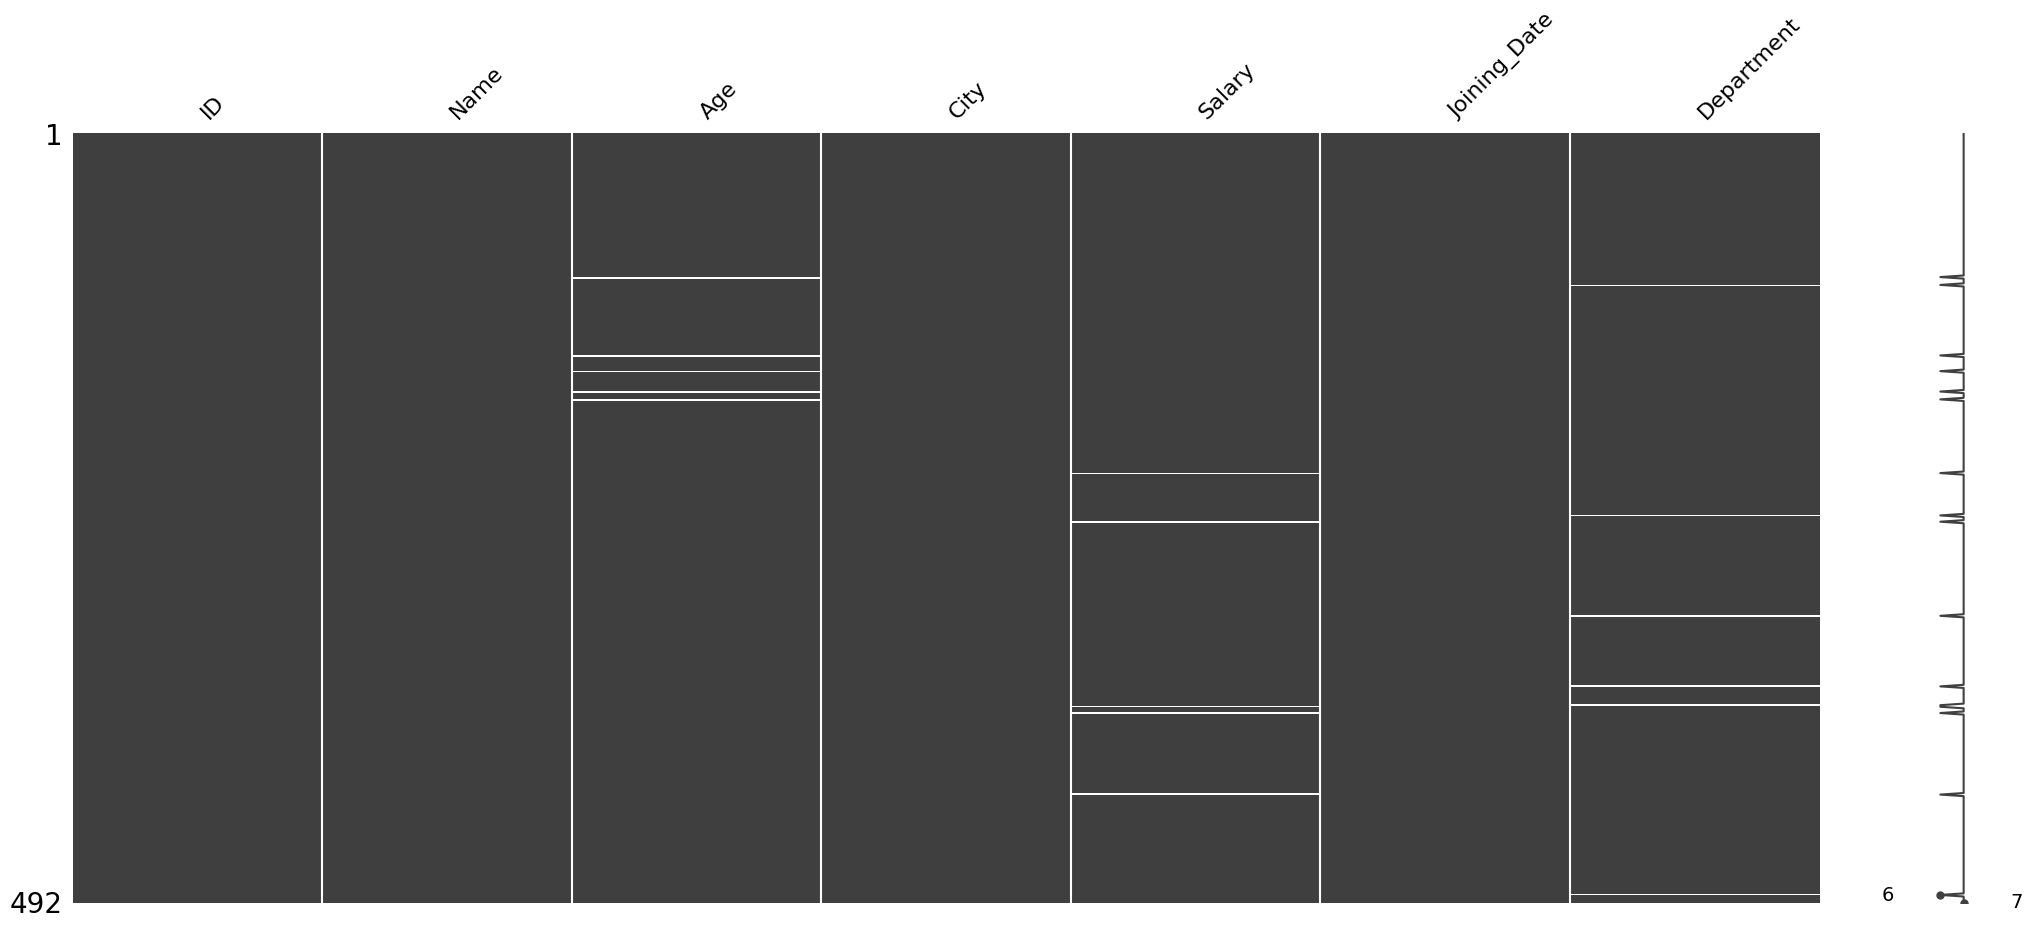

In [ ]:
import missingno as mp
mp.matrix(df)

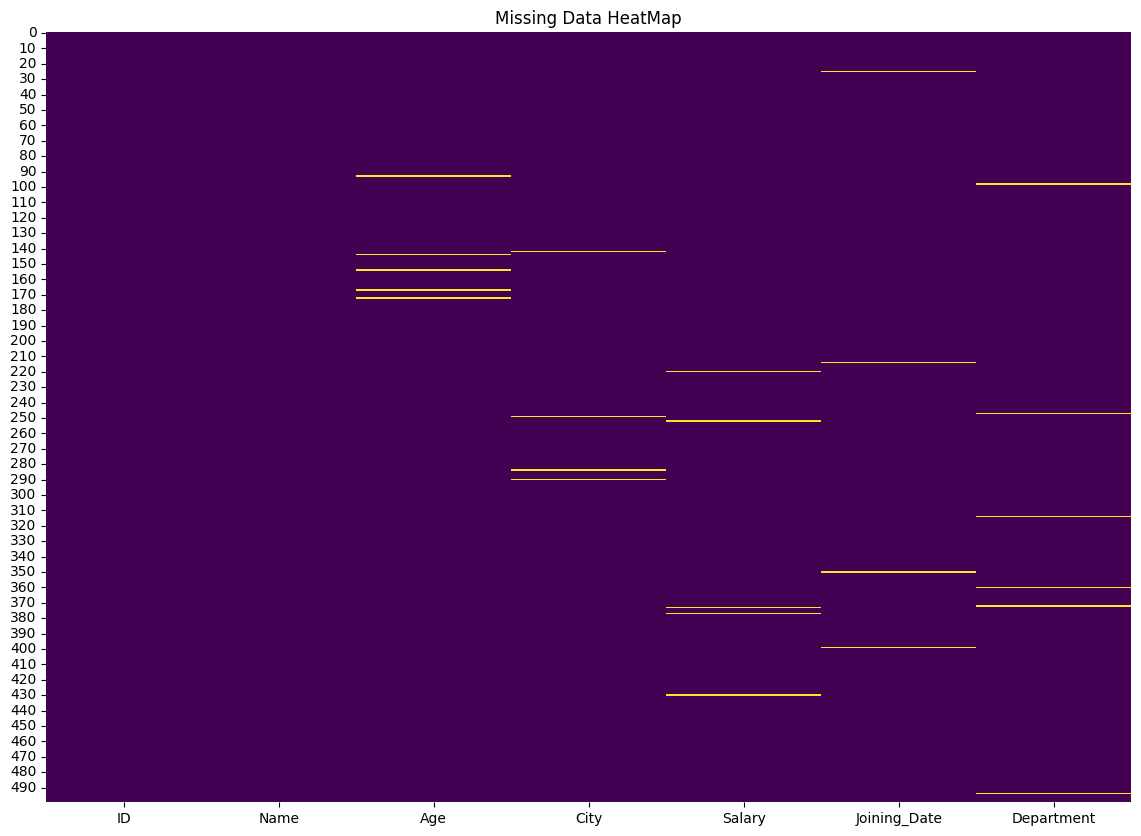

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title("Missing Data HeatMap")
plt.show()

In [ ]:
# titanic = df.drop('Age', axis=1)
# # Note: axis=1 for column and axis=0 for row

# print(titanic.head()) for removing whole column do like this


In [ ]:
df.isnull().sum()

,0
ID,0
Name,0
Age,5
City,4
Salary,5
Joining_Date,4
Department,6


In [ ]:
df.dropna(subset=['City','Joining_Date','Department'],inplace=True)
df.isnull().sum()

,0
ID,0
Name,0
Age,5
City,0
Salary,5
Joining_Date,0
Department,0


In [ ]:
df.shape

(486, 7)

In [ ]:
#Fill the age and salaray in the original dataframe
df['Age']=df['Age'].fillna(df['Age'].median())
df['Salary']=df['Salary'].fillna(df['Salary'].median())
df.isnull().sum()

,0
ID,0
Name,0
Age,0
City,0
Salary,0
Joining_Date,0
Department,0


<Axes: >

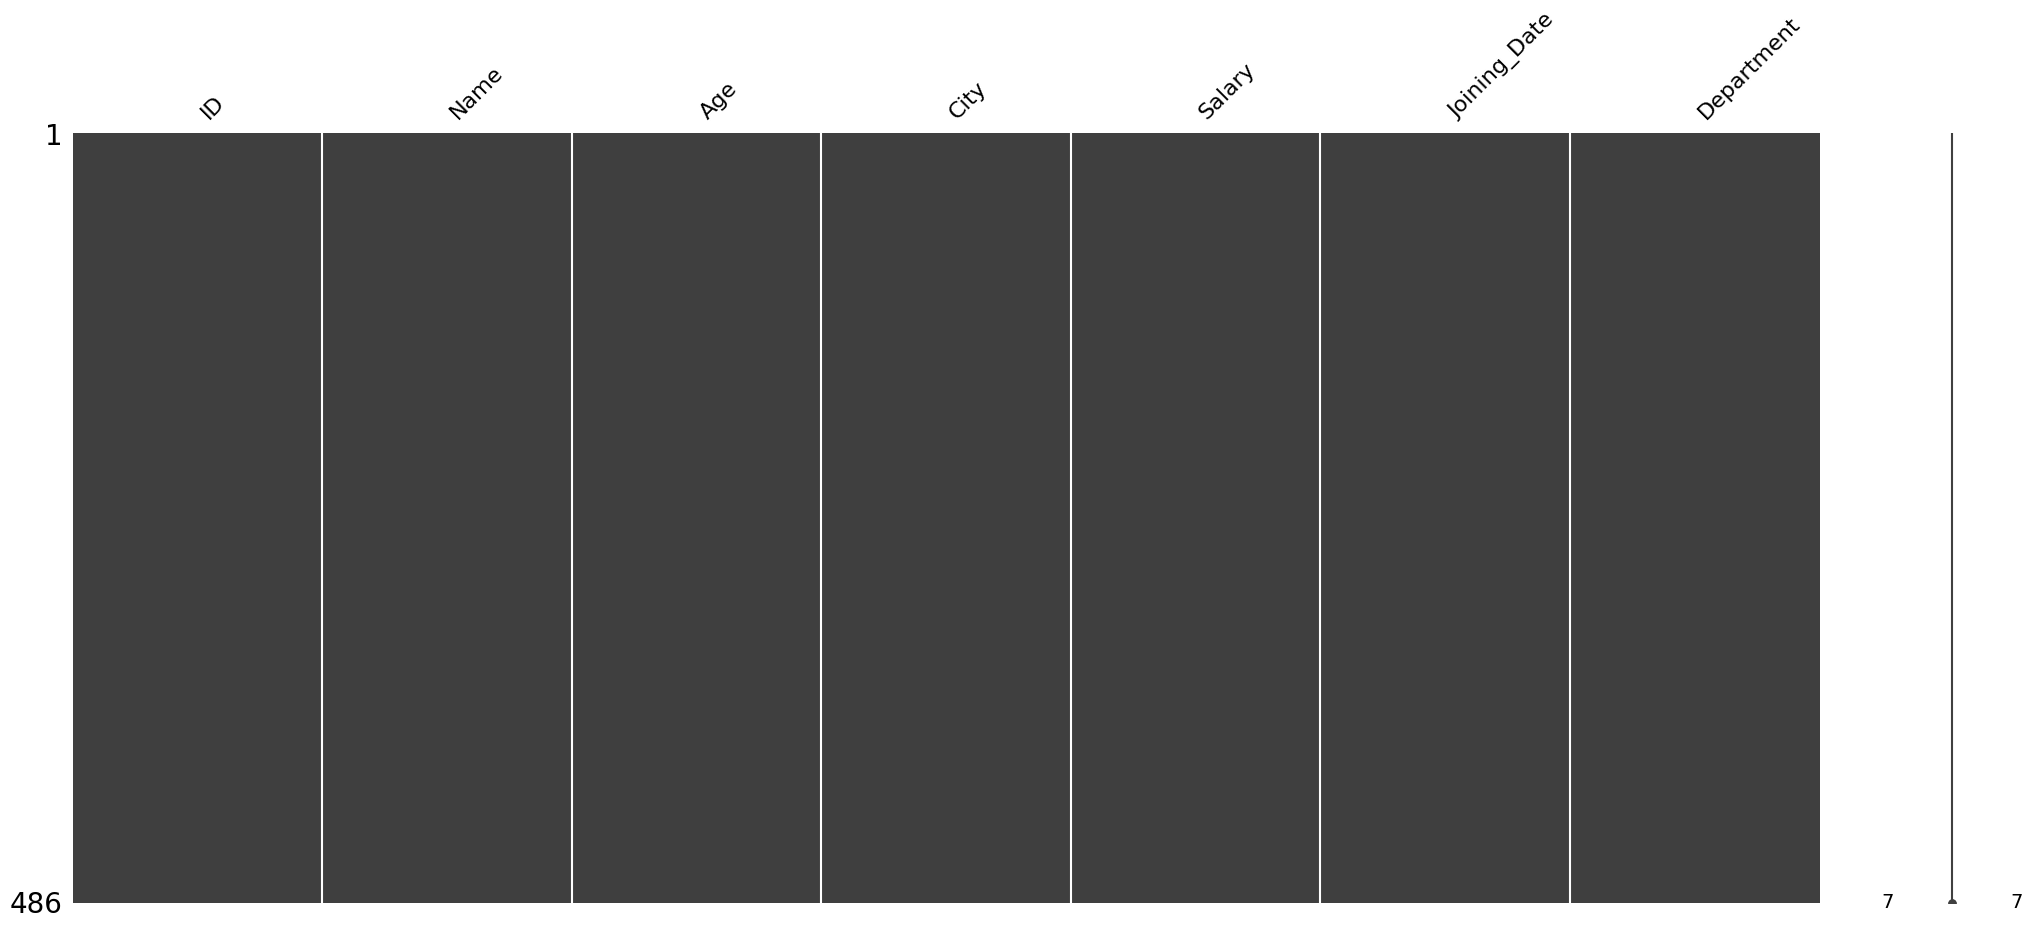

In [ ]:
mp.matrix(df)

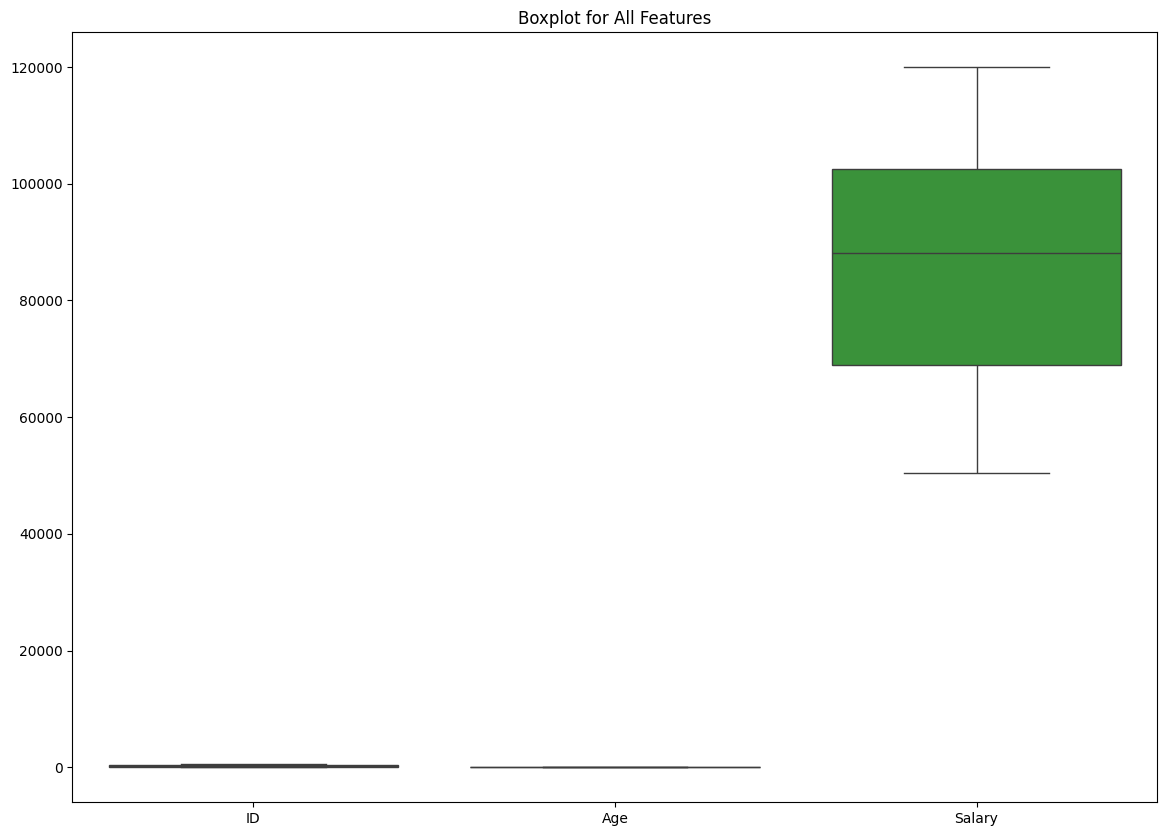

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(data=df)
plt.title("Boxplot for All Features")
plt.show()

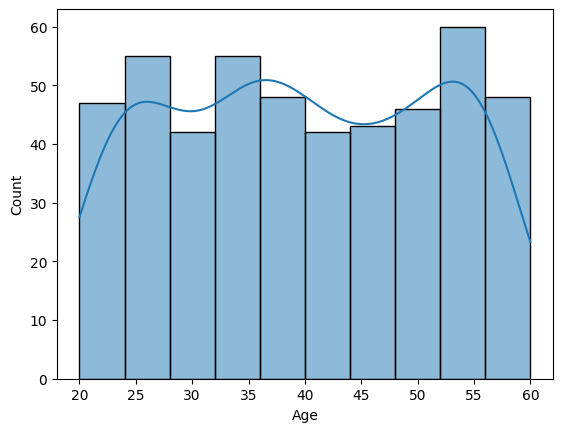

In [ ]:
sns.histplot(df['Age'],kde=True)
plt.show()

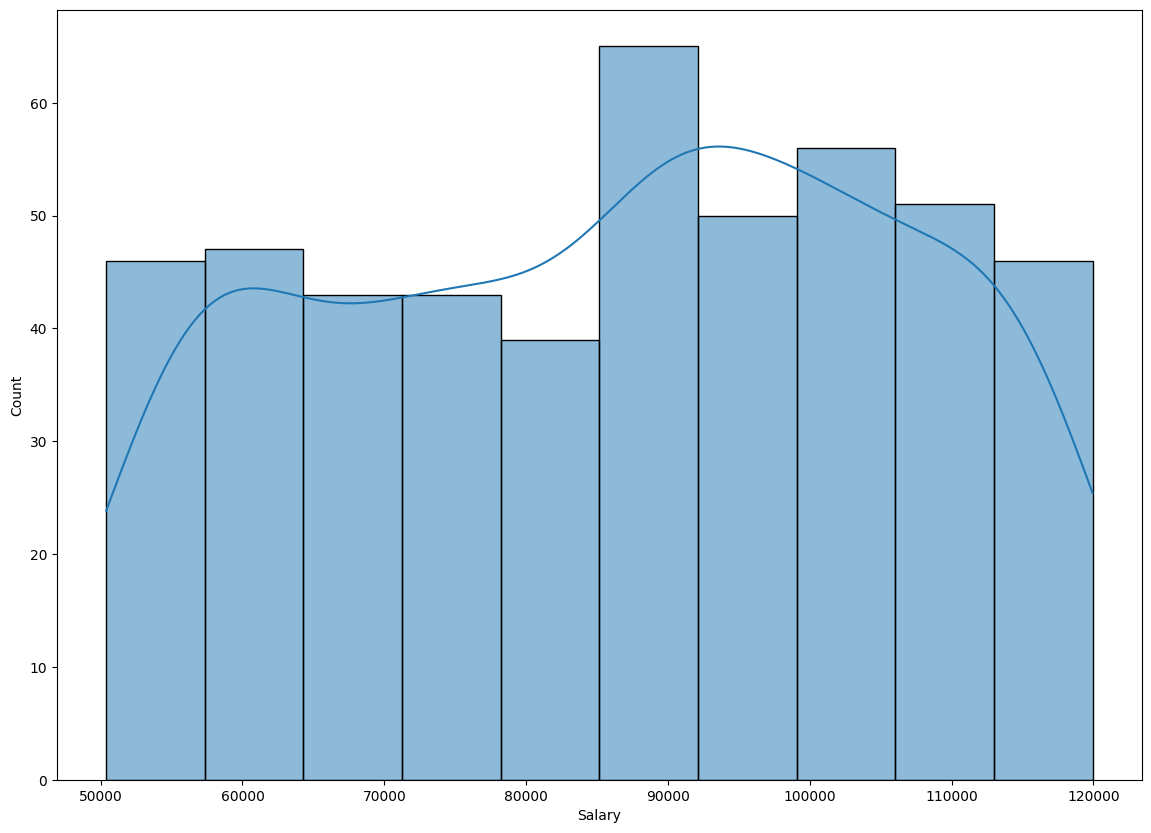

In [ ]:
plt.figure(figsize=(14,10))
sns.histplot(df['Salary'],kde=True)
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler

#Apply RobustScaler
scaler=RobustScaler()
df[['Age','Salary']]=scaler.fit_transform(df[['Age','Salary']])


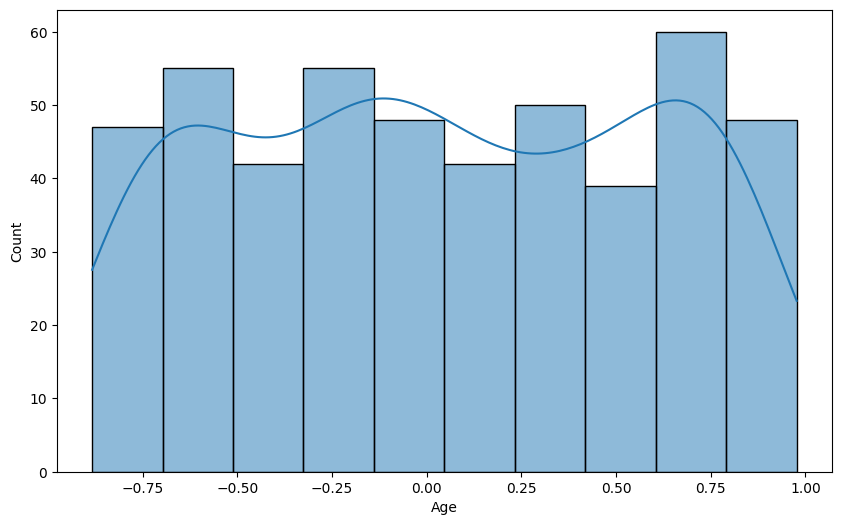

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],kde=True)
plt.show()

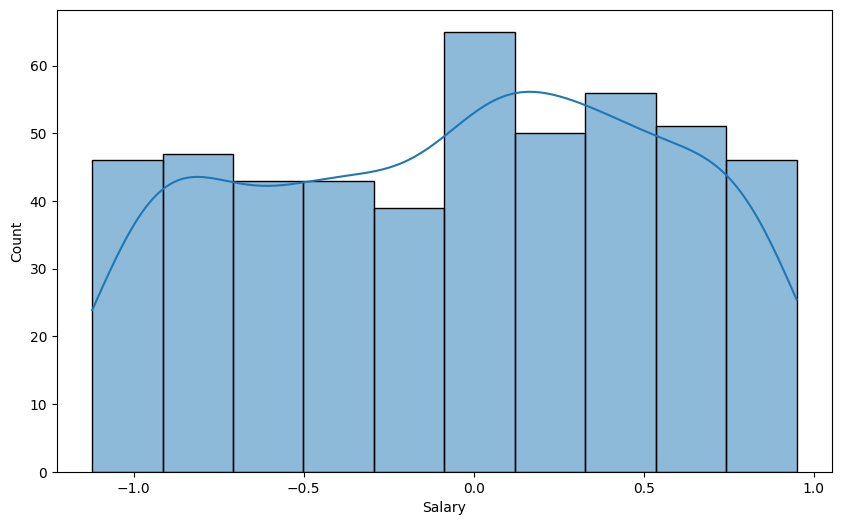

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Salary'],kde=True)
plt.show()

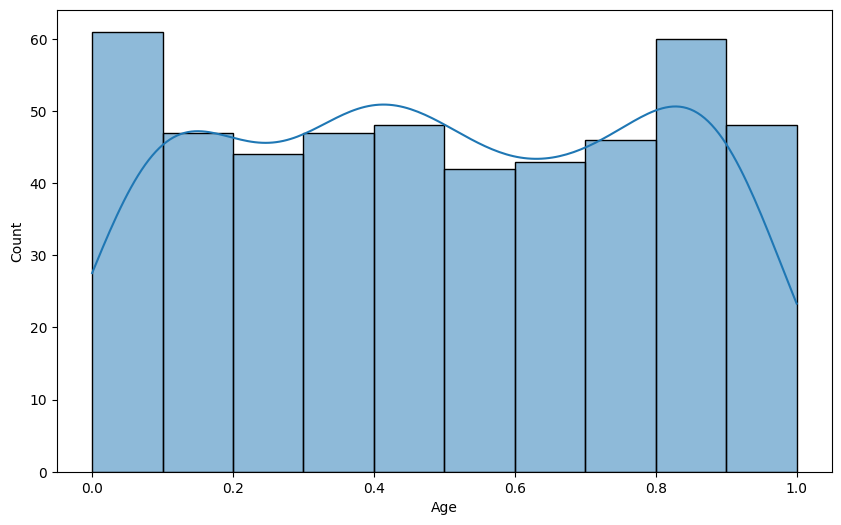

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['Age','Salary']]=scaler.fit_transform(df[['Age','Salary']])
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],kde=True)
plt.show()

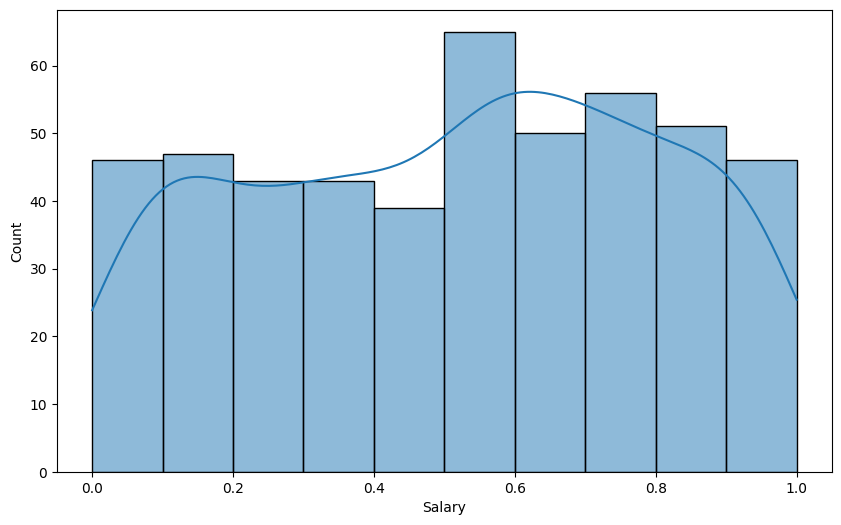

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['Age','Salary']]=scaler.fit_transform(df[['Age','Salary']])
plt.figure(figsize=(10,6))
sns.histplot(df['Salary'],kde=True)
plt.show()

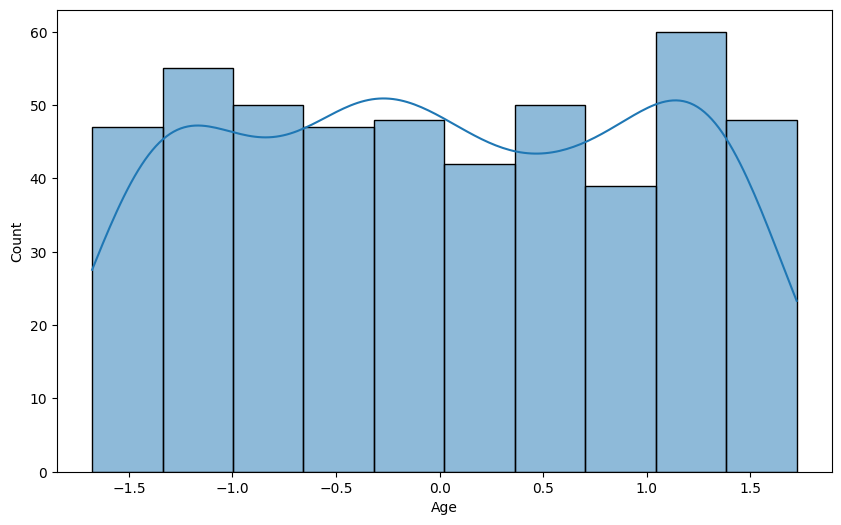

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['Age','Salary']]=scaler.fit_transform(df[['Age','Salary']])
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],kde=True)
plt.show()

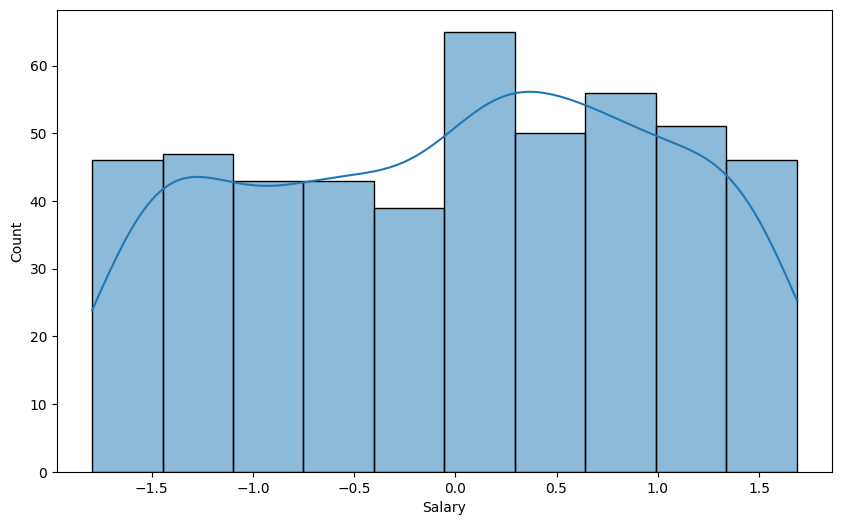

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['Age','Salary']]=scaler.fit_transform(df[['Age','Salary']])
plt.figure(figsize=(10,6))
sns.histplot(df['Salary'],kde=True)
plt.show()

In [ ]:
#Removing duplicates on the basis of id (ther's no specific identifier to remove)
df.drop_duplicates(subset=['ID'],inplace=True)
df.shape

#If other than id has to be checked then use ignore_index=True in parameters

(486, 7)

In [ ]:
!pip install ydata-profiling --q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.9 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]